[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mund99/Coursera_Python_Statistics_Financial_Analysis/blob/main/week2.ipynb)

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

# Frequency and Distribution

In [2]:
# Mimic rolling dice game for 50 times 

dice = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50 
results = [dice.sample(n=2, replace=True).sum().loc[0] for i in range(trial)]

# sample(n=2, replace=True): Simulating the rolling of two dice
# n: number or rows
# replace: determines whether sampling is done with replacement or not, "True" means the same row can be selected multiple times

In [3]:
# Summarise the results of sum of faces by frequency 

# Transform the results into a DataFrame 
freq = pd.DataFrame(results, columns=['Counts'])

# Count by value, and remove the header name 
freq = freq['Counts'].value_counts().rename_axis(None)

# Sort by index 
sort_freq = freq.sort_index()

sort_freq

2     2
3     3
4     4
5     2
6     9
7     8
8     7
9     6
10    2
11    6
12    1
Name: count, dtype: int64

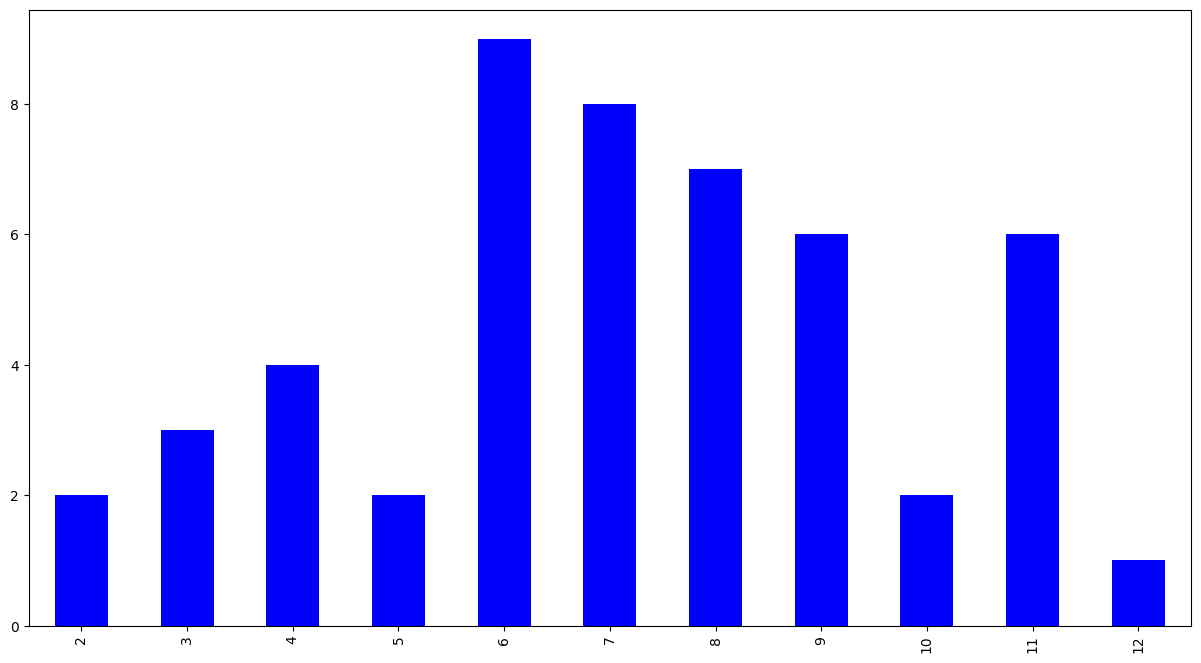

In [4]:
# Plot the sort frequency result 
sort_freq.plot(kind='bar', color='blue', figsize=(15,8))
plt.show()

## Relative Frequency 

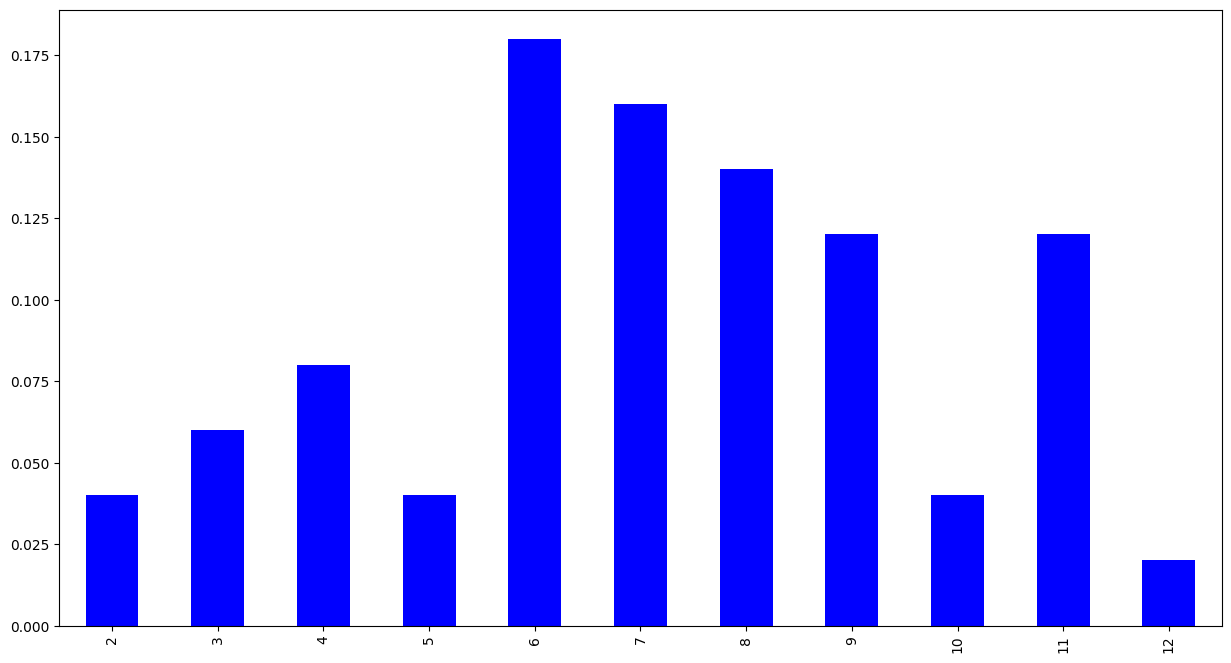

In [5]:
# Using relative frequency, we can rescale the frequency 
# so that we can compare results from different number of trials 

relative_freq = sort_freq / trial
relative_freq.plot(kind='bar', color='blue', figsize=(15,8))

plt.show()

In [6]:
# Make this into a function with the input of number of trial 

def rolling_dice_sampling(trial):
    dice = pd.DataFrame([1, 2, 3, 4, 5, 6])
    results = [dice.sample(n=2, replace=True).sum().loc[0] for _ in range(trial)]
    
    # Transform the results into a DataFrame
    freq = pd.DataFrame(results, columns=['Counts'])
    
    # Count by value and remove the header name
    freq = freq['Counts'].value_counts().rename_axis(None)
    
    # Sort by index
    sort_freq = freq.sort_index()
    
    # Calculate relative frequencies
    relative_freq = sort_freq / trial

    return relative_freq

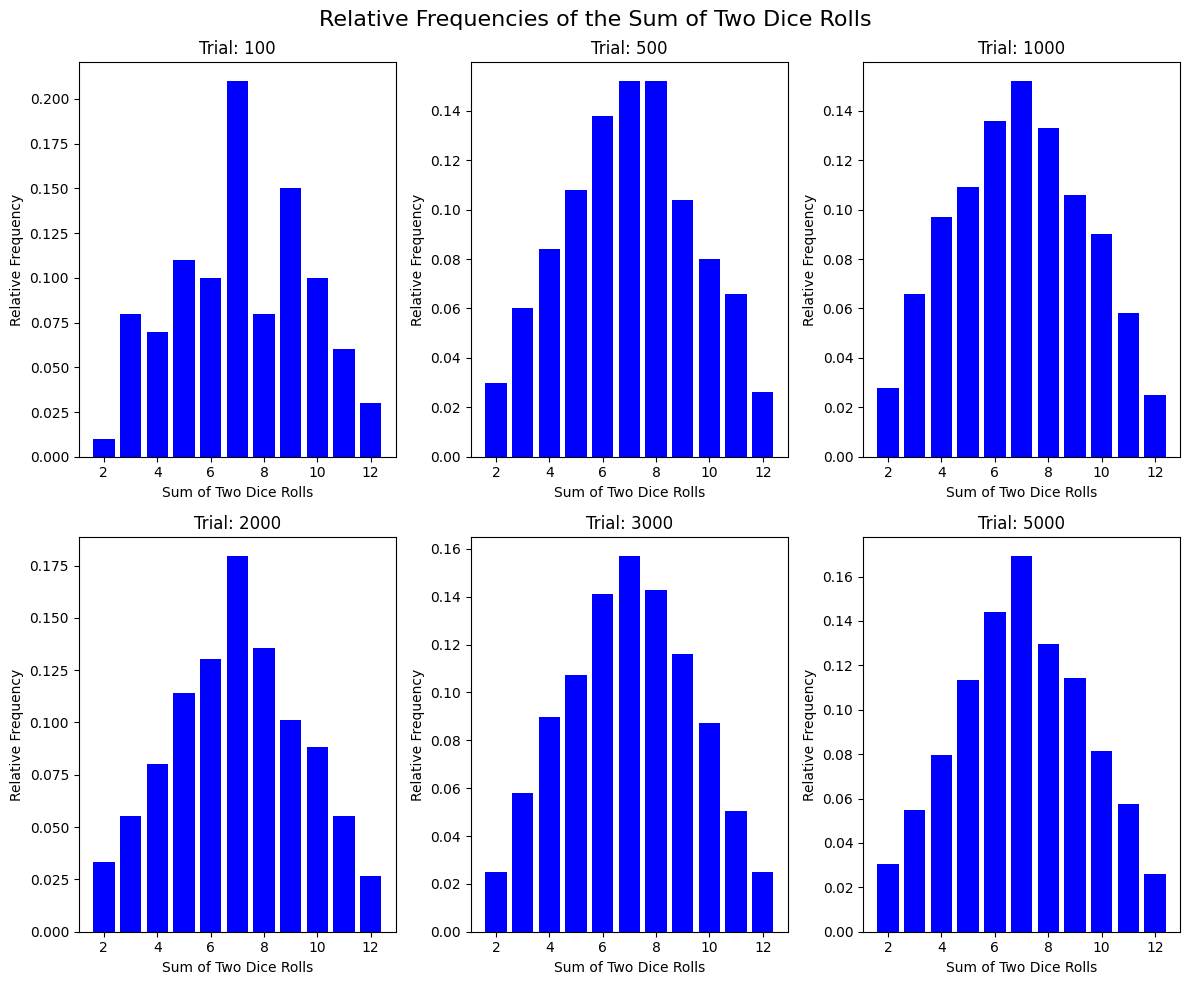

In [7]:
trial_100 = rolling_dice_sampling(100)
trial_500 = rolling_dice_sampling(500)
trial_1000 = rolling_dice_sampling(1000)
trial_2000 = rolling_dice_sampling(2000)
trial_3000 = rolling_dice_sampling(3000)
trial_5000 = rolling_dice_sampling(5000)

fig, ax = plt.subplots(2, 3, figsize=(12, 10))
fig.suptitle('Relative Frequencies of the Sum of Two Dice Rolls', fontsize=16)

# Plot trial_100
ax[0, 0].bar(trial_100.index, trial_100.values, color='blue')
ax[0, 0].set_xlabel('Sum of Two Dice Rolls')
ax[0, 0].set_ylabel('Relative Frequency')
ax[0, 0].set_title('Trial: 100')

# Plot trial_500
ax[0, 1].bar(trial_500.index, trial_500.values, color='blue')
ax[0, 1].set_xlabel('Sum of Two Dice Rolls')
ax[0, 1].set_ylabel('Relative Frequency')
ax[0, 1].set_title('Trial: 500')

# Plot trial_1000
ax[0, 2].bar(trial_1000.index, trial_1000.values, color='blue')
ax[0, 2].set_xlabel('Sum of Two Dice Rolls')
ax[0, 2].set_ylabel('Relative Frequency')
ax[0, 2].set_title('Trial: 1000')

# Plot trial_2000
ax[1, 0].bar(trial_2000.index, trial_2000.values, color='blue')
ax[1, 0].set_xlabel('Sum of Two Dice Rolls')
ax[1, 0].set_ylabel('Relative Frequency')
ax[1, 0].set_title('Trial: 2000')

# Plot trial_3000
ax[1, 1].bar(trial_3000.index, trial_3000.values, color='blue')
ax[1, 1].set_xlabel('Sum of Two Dice Rolls')
ax[1, 1].set_ylabel('Relative Frequency')
ax[1, 1].set_title('Trial: 3000')

# Plot trial_5000
ax[1, 2].bar(trial_5000.index, trial_5000.values, color='blue')
ax[1, 2].set_xlabel('Sum of Two Dice Rolls')
ax[1, 2].set_ylabel('Relative Frequency')
ax[1, 2].set_title('Trial: 5000')

plt.tight_layout()
plt.show()

We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. 

## Expectation and Variance of a Distribution 

In [8]:
# Assume we have a fair dice 
# Meaning all faces will be shown with equal probabilities 

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the probabilities for each outcome
probabilities = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

# Normalize the probabilities by dividing them by the total number of outcomes (36 for two dice rolls)
probabilities_normalized = [prob / 36 for prob in probabilities]

# Assign the normalized probabilities to the 'Prob' column in the DataFrame
X_distri['Prob'] = probabilities_normalized

X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


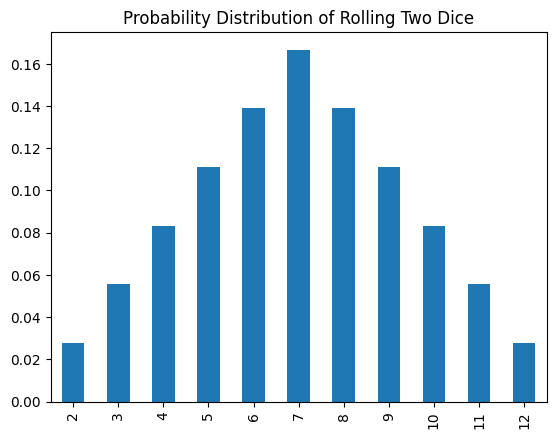

In [9]:
# plots the probability distribution

X_distri['Prob'].plot(kind='bar')
plt.title('Probability Distribution of Rolling Two Dice')
plt.show()

In [10]:
# Calculate the mean and variance 

mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

mean, var

(6.999999999999998, 5.833333333333333)

## Empirical Mean and Variance

In [11]:
# When the experiment trial is high enough
# we could get the mean and variance close to the expected result 

trial = 20000
results = [dice.sample(2, replace=True).sum().loc[0] for i in range(trial)]
results = pd.Series(results)

results.mean(), results.var()

(7.0165, 5.826719085954298)

# Models of Stock Return

In [12]:
# obtain data 
MSFT = pd.read_csv('data/microsoft.csv')
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
MSFT.set_index('Date', inplace=True)

In [13]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


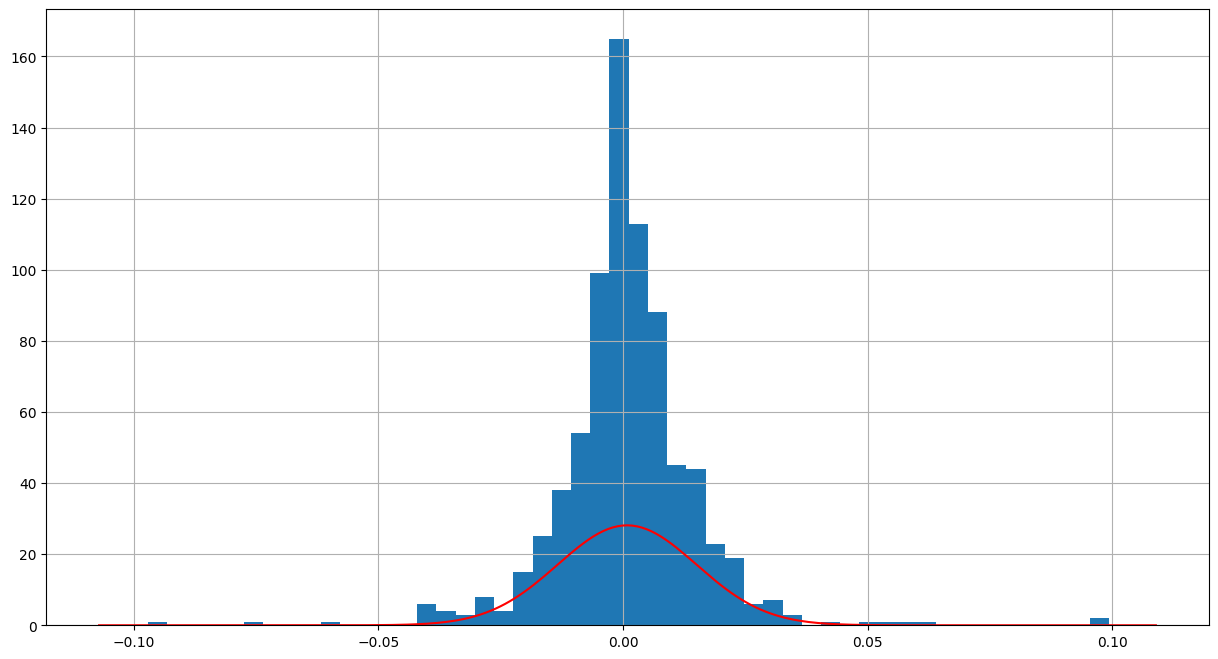

In [14]:
# Log of daily buy trade return 
MSFT['LogReturn'] = np.log(MSFT['Close']).shift(-1) - np.log(MSFT['Close'])

# Plot a histogram to see the distribution 
from scipy.stats import norm

returnMean = MSFT['LogReturn'].mean()
returnStd = MSFT['LogReturn'].std(ddof=1)

density = pd.DataFrame() 
density['x'] = np.arange(MSFT['LogReturn'].min()-0.01, MSFT['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], returnMean, returnStd)

MSFT['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()


# ddof = Delta Degrees of Freedom 
# if calc population standard deviation (ddof = 0)
# if calc sample standard deviation (ddof = 1) 

## Calcuate the probability of the stock price will drop over a certain percentage in a day 

In [15]:
# probability of the stock price will drop more than 5% in a day 
prob_return1 = norm.cdf(-0.05, returnMean, returnStd)
prob_percentage = prob_return1 * 100
print('The Probability is {:.4}%'.format(prob_percentage))

The Probability is 0.02%


In [16]:
# probability of the stock price will drop more than 0.05% in a day 
prob_return1 = norm.cdf(-0.0005, returnMean, returnStd)
prob_percentage = prob_return1 * 100
print('The Probability is {:.4f}%'.format(prob_percentage))

The Probability is 46.29%


## Calculate the probability of the stock price will drop over a certain percentage in a year

In [17]:
# drop over 10% in 220 days
mean_220 = 220*returnMean
std_220 = (220**0.5) * returnStd

# The mean and variance of daily term is multiplied with 220 days 
# because in finance, it is often assumed that daily returns are independent and identically distributed over time. 

prob_percentage = prob_return1 * 100
print('The probability of dropping over 10% in 220 days is {:.4f}% '.format(norm.cdf(-0.1, mean_220, std_220)))

The probability of dropping over 10% in 220 days is 0.0914% 


## Calculate Value at Risk (VaR) 

In [18]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, returnMean, returnStd)
print('Single day value at risk ', VaR)

Single day value at risk  -0.02252336240706501


In [19]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, returnMean, returnStd))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, returnMean, returnStd))

5% quantile  -0.02252336240706501
95% quantile  0.02416382537931104
